# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Your code here.
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

In [5]:
student_data.columns=['age','tardies']
student_data.sort_values(by='age')

,age,tardies
0,17,10
6,19,9
3,21,9
7,26,6
2,27,5
9,30,3
4,36,4
5,48,2
1,51,1
8,54,0


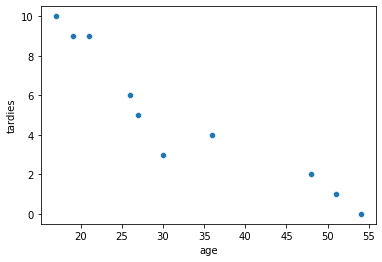

In [6]:
# Your code here.
sns.scatterplot(x=student_data['age'],y=student_data['tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#Your response here. 
#it looks the tardies is decreasing with age which would support the hypothesis

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
#correlation:
student_data.corr()
# The correlation is very strong 

#covariance:

student_data.cov()

# we have a negativ covariance if the age increase the tardines decrease

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

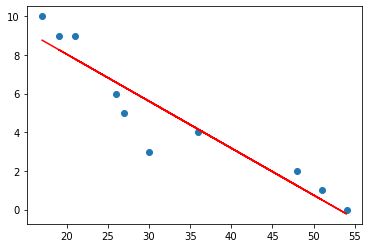

In [8]:
# Your response here.
X = student_data['age']
y = student_data['tardies']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = student_data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = student_data.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

#Your response here. 
#It looks like the hypothesis was correct, the prediction also shows a clear trend 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
# Your response here. 
vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']].corrwith(vehicles['CO2 Emission Grams/Mile'])

# The fuel ['Fuel Barrels/Year';'Fuel Cost/Year';'Cylinders'] have a very high correlation years provides the least amount of information for CO2 emissions  

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
# Traning and testing set

y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# train the modell 
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.32293524  1.89394764 19.12962654 -3.00962096  0.03201504]


MAE: 7.445588643759879
MSE: 281.0310485822536
RMSE: 16.763980690225505


,Coeffecient
Year,-0.322935
Cylinders,1.893948
Fuel Barrels/Year,19.129627
Combined MPG,-3.009621
Fuel Cost/Year,0.032015


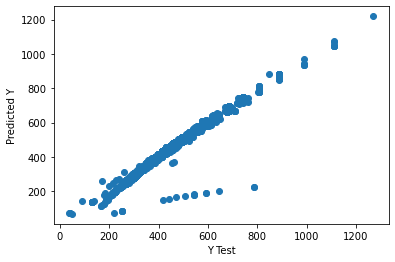

In [18]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

The most important variable for the CO2 Emission is the Fuel Barrels/Year it has the greatest effect on the emissions, which can be seen in the coefficients.

The MSE is very high so the modell sometimes miss by a high degree 

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [55]:
# Your code here.

data = {'Invited':[1,3,4,6,8,9,11,14],'Attended':[1,2,4,4,5,7,8,13]}

party_data = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

          Invited  Attended
Invited   1.00000   0.96523
Attended  0.96523   1.00000


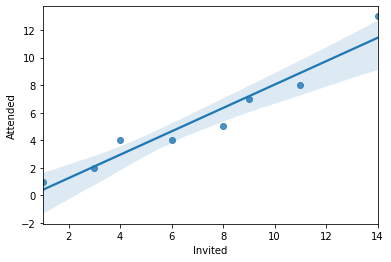

In [56]:
# Your code here.
print(party_data.corr())
sns.regplot(data=party_data,x='Invited',y='Attended')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [51]:
# Your response here. 
x = np.array(party_data['Invited']).reshape(-1, 1)
y = party_data['Attended']

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

# the scatter plot and the calculation both show a very strong correlation, that support the assumption that the number of attendes decrease with higher invitation numbers 

coefficient of determination: 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

          Invited  Attended
Invited   1.00000   0.96523
Attended  0.96523   1.00000
coefficient of determination: 0.9723364485981308


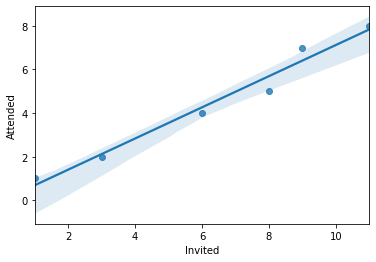

In [59]:
# Your response here. 
data_wo_outliers = {'Invited':[1,3,6,8,9,11],'Attended':[1,2,4,5,7,8]}

party_data_wo_outliers = pd.DataFrame(data_wo_outliers)

print(party_data.corr())
sns.regplot(data=party_data_wo_outliers,x='Invited',y='Attended')

x = np.array(party_data_wo_outliers['Invited']).reshape(-1, 1)
y = party_data_wo_outliers['Attended']

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [53]:
# Your response here. 
# The models did not change a lot 

,Invited,Attended
0,1,1
1,3,2
2,6,4
3,8,5
4,9,7
5,11,8
